# NLP Toolkits and Preprocessing Exercises

## Introduction

We will be using [review data from Kaggle](https://www.kaggle.com/snap/amazon-fine-food-reviews) to practice preprocessing text data. The dataset contains user reviews for many products, but today we'll be focusing on the product in the dataset that had the most reviews - an oatmeal cookie. 

The following code will help you load in the data. If this is your first time using nltk, you'll to need to pip install it first.

In [1]:
import nltk
#nltk.download() #<-- Run this if it's your first time using nltk to download all of the datasets and models
import re
import pandas as pd

In [2]:
data = pd.read_csv('cookie_reviews.csv')
data.head()

,user_id,stars,reviews
0,A368Z46FIKHSEZ,5,I love these cookies! Not only are they healt...
1,A1JAPP1CXRG57A,5,Quaker Soft Baked Oatmeal Cookies with raisins...
2,A2Z9JNXPIEL2B9,5,I am usually not a huge fan of oatmeal cookies...
3,A31CYJQO3FL586,5,I participated in a product review that includ...
4,A2KXQ2EKFF3K2G,5,My kids loved these. I was very pleased to giv...


## Question 1 ##

* Determine how many reviews there are in total.
* Determine the percent of 1, 2, 3, 4 and 5 star reviews.
* Determine the distribution of character lengths for the reviews, by listing the values and by plotting a histogram.

In [3]:
#The number of reviews in total
print('The number of review in total is {} reviews'.format(len(data)))

The number of review in total is 913 reviews


In [4]:
#The percentage of 1,2,3,4 and 5 star reviews
data.groupby('stars')['stars'].count()/sum(data.groupby('stars')['stars'].count())

stars
1    0.004381
2    0.013143
3    0.061336
4    0.237678
5    0.683461
Name: stars, dtype: float64

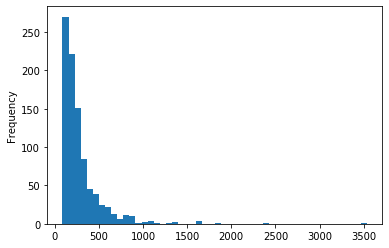

In [5]:
#The distribution of character lengths for the reviews, by listing the 
#values and by plotting a histogram.
data['length'] = data['reviews'].apply(lambda x: len(x))
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
data['length'].plot(bins=50,kind = 'hist')

## Question 2 ##

* Apply the following preprocessing steps:

     1. Remove all words that contain numbers
     2. Make all the text lowercase
     3. Remove punctuation
     4. Tokenize the reviews into words
     
  Hint #1: Use regular expressions.
  
  Hint #2: The cookie review in the second row has numbers, upper case letters and punctuation. You can use it to test out your regular expressions.
     
     
* Find the most common words.
* Determine the word length distribution over the entire corpus.

In [6]:
#Removing all words in the review that contain numbers
data['reviews'] = data['reviews'].apply(lambda x: re.sub('\w*\d\w*',' ',x))
data

,user_id,stars,reviews,length
0,A368Z46FIKHSEZ,5,I love these cookies! Not only are they healt...,135
1,A1JAPP1CXRG57A,5,Quaker Soft Baked Oatmeal Cookies with raisins...,1316
2,A2Z9JNXPIEL2B9,5,I am usually not a huge fan of oatmeal cookies...,261
3,A31CYJQO3FL586,5,I participated in a product review that includ...,530
4,A2KXQ2EKFF3K2G,5,My kids loved these. I was very pleased to giv...,169
5,A2U5TAIAQ675BL,5,I really enjoyed these individually wrapped bi...,232
6,A1R4PIBZBD3NZ0,4,I was surprised at how soft the cookie was. I ...,166
7,A1ECQ8LJMXG4WI,5,Filled with oats and raisins you'll love this ...,142
8,A3MSG4E5MLI1XP,5,"I was recently given a complimentary ""vox box""...",900
9,A3BUDUV9GORLWH,5,the best and freshest cookie that comes in a p...,99


In [7]:
#Making all the texts in the review lowercase
data['reviews'] = data['reviews'].apply(lambda x: x.lower())
data

,user_id,stars,reviews,length
0,A368Z46FIKHSEZ,5,i love these cookies! not only are they healt...,135
1,A1JAPP1CXRG57A,5,quaker soft baked oatmeal cookies with raisins...,1316
2,A2Z9JNXPIEL2B9,5,i am usually not a huge fan of oatmeal cookies...,261
3,A31CYJQO3FL586,5,i participated in a product review that includ...,530
4,A2KXQ2EKFF3K2G,5,my kids loved these. i was very pleased to giv...,169
5,A2U5TAIAQ675BL,5,i really enjoyed these individually wrapped bi...,232
6,A1R4PIBZBD3NZ0,4,i was surprised at how soft the cookie was. i ...,166
7,A1ECQ8LJMXG4WI,5,filled with oats and raisins you'll love this ...,142
8,A3MSG4E5MLI1XP,5,"i was recently given a complimentary ""vox box""...",900
9,A3BUDUV9GORLWH,5,the best and freshest cookie that comes in a p...,99


In [8]:
import string
#Removing punctuations
data['reviews'] = data['reviews'].apply(lambda x:  re.sub('[%s]' % re.escape(string.punctuation), ' ',x))
data

,user_id,stars,reviews,length
0,A368Z46FIKHSEZ,5,i love these cookies not only are they healt...,135
1,A1JAPP1CXRG57A,5,quaker soft baked oatmeal cookies with raisins...,1316
2,A2Z9JNXPIEL2B9,5,i am usually not a huge fan of oatmeal cookies...,261
3,A31CYJQO3FL586,5,i participated in a product review that includ...,530
4,A2KXQ2EKFF3K2G,5,my kids loved these i was very pleased to giv...,169
5,A2U5TAIAQ675BL,5,i really enjoyed these individually wrapped bi...,232
6,A1R4PIBZBD3NZ0,4,i was surprised at how soft the cookie was i ...,166
7,A1ECQ8LJMXG4WI,5,filled with oats and raisins you ll love this ...,142
8,A3MSG4E5MLI1XP,5,i was recently given a complimentary vox box ...,900
9,A3BUDUV9GORLWH,5,the best and freshest cookie that comes in a p...,99


In [9]:
#Tokenizing the reviews into words
from nltk.tokenize import word_tokenize
data['reviews'] = data['reviews'].apply(word_tokenize)

data

,user_id,stars,reviews,length
0,A368Z46FIKHSEZ,5,"[i, love, these, cookies, not, only, are, they...",135
1,A1JAPP1CXRG57A,5,"[quaker, soft, baked, oatmeal, cookies, with, ...",1316
2,A2Z9JNXPIEL2B9,5,"[i, am, usually, not, a, huge, fan, of, oatmea...",261
3,A31CYJQO3FL586,5,"[i, participated, in, a, product, review, that...",530
4,A2KXQ2EKFF3K2G,5,"[my, kids, loved, these, i, was, very, pleased...",169
5,A2U5TAIAQ675BL,5,"[i, really, enjoyed, these, individually, wrap...",232
6,A1R4PIBZBD3NZ0,4,"[i, was, surprised, at, how, soft, the, cookie...",166
7,A1ECQ8LJMXG4WI,5,"[filled, with, oats, and, raisins, you, ll, lo...",142
8,A3MSG4E5MLI1XP,5,"[i, was, recently, given, a, complimentary, vo...",900
9,A3BUDUV9GORLWH,5,"[the, best, and, freshest, cookie, that, comes...",99


In [10]:
#Finding the most common words
count_data = data['reviews'].apply(lambda x: ' '.join(x))
text = [' '.join([i for i in count_data])]
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')
X_ = cv.fit_transform(text)
word_count_ = pd.DataFrame(X_.toarray(), columns=cv.get_feature_names())
word_count_.sort_values(by = 0,axis = 1,ascending=False)

,cookies,cookie,soft,oatmeal,br,good,quaker,like,taste,love,...,influence,inedible,indulgence,individualy,individuals,indicates,incorporate,inclusion,inch,zoo
0,843,842,707,482,379,349,343,297,294,291,...,1,1,1,1,1,1,1,1,1,1


In [11]:
#Determining the word length distribution over the entire corpus
from nltk.probability import FreqDist
count_data = data['reviews'].apply(lambda x: ' '.join(x))
text = ' '.join(i for i in count_data)
words = nltk.tokenize.word_tokenize(text)
fdist = FreqDist(words)
word_count_length = pd.DataFrame(fdist.values(),fdist.keys(), columns= ['word_length'])
word_count_length

,word_length
i,2145
love,291
these,665
cookies,843
not,366
only,76
are,746
they,738
healthy,92
but,353


## Question 3 ##

* Apply the following preprocessing techniques:

     * Remove stopwords
     * Perform parts of speech tagging
     * Perform stemming
     * Optional: Perform lemmatization

  Recommendation: Create a new column in your data set for every preprocessing technique you apply, so you can see the progression of the reviews text.

In [12]:
#Removing stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

data['reviews_with_stop_words_removed'] = data['reviews'].apply(lambda x: ' '.join([item for item in x if item not in stop_words]))
data

,user_id,stars,reviews,length,reviews_with_stop_words_removed
0,A368Z46FIKHSEZ,5,"[i, love, these, cookies, not, only, are, they...",135,love cookies healthy taste great soft definite...
1,A1JAPP1CXRG57A,5,"[quaker, soft, baked, oatmeal, cookies, with, ...",1316,quaker soft baked oatmeal cookies raisins deli...
2,A2Z9JNXPIEL2B9,5,"[i, am, usually, not, a, huge, fan, of, oatmea...",261,usually huge fan oatmeal cookies literally mel...
3,A31CYJQO3FL586,5,"[i, participated, in, a, product, review, that...",530,participated product review included sample hr...
4,A2KXQ2EKFF3K2G,5,"[my, kids, loved, these, i, was, very, pleased...",169,kids loved pleased give kids quick go healthy ...
5,A2U5TAIAQ675BL,5,"[i, really, enjoyed, these, individually, wrap...",232,really enjoyed individually wrapped big oatmea...
6,A1R4PIBZBD3NZ0,4,"[i, was, surprised, at, how, soft, the, cookie...",166,surprised soft cookie usually buy little debbi...
7,A1ECQ8LJMXG4WI,5,"[filled, with, oats, and, raisins, you, ll, lo...",142,filled oats raisins love snack delicious nutri...
8,A3MSG4E5MLI1XP,5,"[i, was, recently, given, a, complimentary, vo...",900,recently given complimentary vox box influenst...
9,A3BUDUV9GORLWH,5,"[the, best, and, freshest, cookie, that, comes...",99,best freshest cookie comes package ate wishing...


In [13]:
#Performing parts of speech tagging
from nltk.tag import pos_tag
data['reviews_with_parts_of_speech_tagged'] = data['reviews'].apply(lambda x: pos_tag(x))
data

,user_id,stars,reviews,length,reviews_with_stop_words_removed,reviews_with_parts_of_speech_tagged
0,A368Z46FIKHSEZ,5,"[i, love, these, cookies, not, only, are, they...",135,love cookies healthy taste great soft definite...,"[(i, NN), (love, VBP), (these, DT), (cookies, ..."
1,A1JAPP1CXRG57A,5,"[quaker, soft, baked, oatmeal, cookies, with, ...",1316,quaker soft baked oatmeal cookies raisins deli...,"[(quaker, NN), (soft, JJ), (baked, VBD), (oatm..."
2,A2Z9JNXPIEL2B9,5,"[i, am, usually, not, a, huge, fan, of, oatmea...",261,usually huge fan oatmeal cookies literally mel...,"[(i, NNS), (am, VBP), (usually, RB), (not, RB)..."
3,A31CYJQO3FL586,5,"[i, participated, in, a, product, review, that...",530,participated product review included sample hr...,"[(i, NN), (participated, VBD), (in, IN), (a, D..."
4,A2KXQ2EKFF3K2G,5,"[my, kids, loved, these, i, was, very, pleased...",169,kids loved pleased give kids quick go healthy ...,"[(my, PRP$), (kids, NNS), (loved, VBD), (these..."
5,A2U5TAIAQ675BL,5,"[i, really, enjoyed, these, individually, wrap...",232,really enjoyed individually wrapped big oatmea...,"[(i, NN), (really, RB), (enjoyed, VBN), (these..."
6,A1R4PIBZBD3NZ0,4,"[i, was, surprised, at, how, soft, the, cookie...",166,surprised soft cookie usually buy little debbi...,"[(i, NN), (was, VBD), (surprised, VBN), (at, I..."
7,A1ECQ8LJMXG4WI,5,"[filled, with, oats, and, raisins, you, ll, lo...",142,filled oats raisins love snack delicious nutri...,"[(filled, VBN), (with, IN), (oats, NNS), (and,..."
8,A3MSG4E5MLI1XP,5,"[i, was, recently, given, a, complimentary, vo...",900,recently given complimentary vox box influenst...,"[(i, NN), (was, VBD), (recently, RB), (given, ..."
9,A3BUDUV9GORLWH,5,"[the, best, and, freshest, cookie, that, comes...",99,best freshest cookie comes package ate wishing...,"[(the, DT), (best, JJS), (and, CC), (freshest,..."


In [14]:
#Performing stemming
from nltk.stem.lancaster import  LancasterStemmer
stemmer = LancasterStemmer()
data['reviews_with_stemming'] = data['reviews'].apply(lambda x: ' '.join([stemmer.stem(i) for i in x]))
data

,user_id,stars,reviews,length,reviews_with_stop_words_removed,reviews_with_parts_of_speech_tagged,reviews_with_stemming
0,A368Z46FIKHSEZ,5,"[i, love, these, cookies, not, only, are, they...",135,love cookies healthy taste great soft definite...,"[(i, NN), (love, VBP), (these, DT), (cookies, ...",i lov thes cooky not on ar they healthy but th...
1,A1JAPP1CXRG57A,5,"[quaker, soft, baked, oatmeal, cookies, with, ...",1316,quaker soft baked oatmeal cookies raisins deli...,"[(quaker, NN), (soft, JJ), (baked, VBD), (oatm...",quak soft bak oatm cooky with raisin ar a deli...
2,A2Z9JNXPIEL2B9,5,"[i, am, usually, not, a, huge, fan, of, oatmea...",261,usually huge fan oatmeal cookies literally mel...,"[(i, NNS), (am, VBP), (usually, RB), (not, RB)...",i am us not a hug fan of oatm cooky but thes l...
3,A31CYJQO3FL586,5,"[i, participated, in, a, product, review, that...",530,participated product review included sample hr...,"[(i, NN), (participated, VBD), (in, IN), (a, D...",i particip in a produc review that includ a sa...
4,A2KXQ2EKFF3K2G,5,"[my, kids, loved, these, i, was, very, pleased...",169,kids loved pleased give kids quick go healthy ...,"[(my, PRP$), (kids, NNS), (loved, VBD), (these...",my kid lov thes i was very pleas to giv my kid...
5,A2U5TAIAQ675BL,5,"[i, really, enjoyed, these, individually, wrap...",232,really enjoyed individually wrapped big oatmea...,"[(i, NN), (really, RB), (enjoyed, VBN), (these...",i real enjoy thes individ wrap big oatm cooky ...
6,A1R4PIBZBD3NZ0,4,"[i, was, surprised, at, how, soft, the, cookie...",166,surprised soft cookie usually buy little debbi...,"[(i, NN), (was, VBD), (surprised, VBN), (at, I...",i was surpr at how soft the cooky was i us buy...
7,A1ECQ8LJMXG4WI,5,"[filled, with, oats, and, raisins, you, ll, lo...",142,filled oats raisins love snack delicious nutri...,"[(filled, VBN), (with, IN), (oats, NNS), (and,...",fil with oat and raisin you ll lov thi snack d...
8,A3MSG4E5MLI1XP,5,"[i, was, recently, given, a, complimentary, vo...",900,recently given complimentary vox box influenst...,"[(i, NN), (was, VBD), (recently, RB), (given, ...",i was rec giv a comply vox box from influenst ...
9,A3BUDUV9GORLWH,5,"[the, best, and, freshest, cookie, that, comes...",99,best freshest cookie comes package ate wishing...,"[(the, DT), (best, JJS), (and, CC), (freshest,...",the best and freshest cooky that com in a pack...


In [15]:
#Performing lemmatization
from nltk.stem import WordNetLemmatizer   
lemmatizer = WordNetLemmatizer() 
data['reviews_with_lemmatization'] = data['reviews_with_parts_of_speech_tagged'].apply(lambda x: ' '.join([WordNetLemmatizer().lemmatize(i[0]) for i in x]))
data

,user_id,stars,reviews,length,reviews_with_stop_words_removed,reviews_with_parts_of_speech_tagged,reviews_with_stemming,reviews_with_lemmatization
0,A368Z46FIKHSEZ,5,"[i, love, these, cookies, not, only, are, they...",135,love cookies healthy taste great soft definite...,"[(i, NN), (love, VBP), (these, DT), (cookies, ...",i lov thes cooky not on ar they healthy but th...,i love these cooky not only are they healthy b...
1,A1JAPP1CXRG57A,5,"[quaker, soft, baked, oatmeal, cookies, with, ...",1316,quaker soft baked oatmeal cookies raisins deli...,"[(quaker, NN), (soft, JJ), (baked, VBD), (oatm...",quak soft bak oatm cooky with raisin ar a deli...,quaker soft baked oatmeal cooky with raisin ar...
2,A2Z9JNXPIEL2B9,5,"[i, am, usually, not, a, huge, fan, of, oatmea...",261,usually huge fan oatmeal cookies literally mel...,"[(i, NNS), (am, VBP), (usually, RB), (not, RB)...",i am us not a hug fan of oatm cooky but thes l...,i am usually not a huge fan of oatmeal cooky b...
3,A31CYJQO3FL586,5,"[i, participated, in, a, product, review, that...",530,participated product review included sample hr...,"[(i, NN), (participated, VBD), (in, IN), (a, D...",i particip in a produc review that includ a sa...,i participated in a product review that includ...
4,A2KXQ2EKFF3K2G,5,"[my, kids, loved, these, i, was, very, pleased...",169,kids loved pleased give kids quick go healthy ...,"[(my, PRP$), (kids, NNS), (loved, VBD), (these...",my kid lov thes i was very pleas to giv my kid...,my kid loved these i wa very pleased to give m...
5,A2U5TAIAQ675BL,5,"[i, really, enjoyed, these, individually, wrap...",232,really enjoyed individually wrapped big oatmea...,"[(i, NN), (really, RB), (enjoyed, VBN), (these...",i real enjoy thes individ wrap big oatm cooky ...,i really enjoyed these individually wrapped bi...
6,A1R4PIBZBD3NZ0,4,"[i, was, surprised, at, how, soft, the, cookie...",166,surprised soft cookie usually buy little debbi...,"[(i, NN), (was, VBD), (surprised, VBN), (at, I...",i was surpr at how soft the cooky was i us buy...,i wa surprised at how soft the cookie wa i usu...
7,A1ECQ8LJMXG4WI,5,"[filled, with, oats, and, raisins, you, ll, lo...",142,filled oats raisins love snack delicious nutri...,"[(filled, VBN), (with, IN), (oats, NNS), (and,...",fil with oat and raisin you ll lov thi snack d...,filled with oat and raisin you ll love this sn...
8,A3MSG4E5MLI1XP,5,"[i, was, recently, given, a, complimentary, vo...",900,recently given complimentary vox box influenst...,"[(i, NN), (was, VBD), (recently, RB), (given, ...",i was rec giv a comply vox box from influenst ...,i wa recently given a complimentary vox box fr...
9,A3BUDUV9GORLWH,5,"[the, best, and, freshest, cookie, that, comes...",99,best freshest cookie comes package ate wishing...,"[(the, DT), (best, JJS), (and, CC), (freshest,...",the best and freshest cooky that com in a pack...,the best and freshest cookie that come in a pa...


## Question 4 ##

* After going through these preprocessing steps, what are the most common words now? Do they make more sense?

In [16]:
text = [' '.join([i for i in data['reviews_with_lemmatization']])]
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')
X = cv.fit_transform(text)
word_count = pd.DataFrame(X.toarray(), columns=cv.get_feature_names())
word_count.sort_values(by = 0,axis = 1,ascending=False)

,cooky,cookie,soft,wa,oatmeal,br,raisin,good,quaker,love,...,imbues,inedible,indulgence,individualy,indicates,incorporate,inclusion,impunity,implied,zoo
0,843,842,707,662,482,379,378,349,347,329,...,1,1,1,1,1,1,1,1,1,1


In [17]:
print('After analysis,I realise that they make more sense')

After analysis,I realise that they make more sense
